In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from  bnse import *
import statsmodels.api as sm

In [2]:
example = 'hr1'

if example=='hr1':
    signal = np.loadtxt('data/hr2.txt') 
    time = (np.linspace(0, 1800,1800))
    time_label = 'time'
    signal_label = 'heart-rate signal'
elif example == 'hr2':
    signal = np.loadtxt('data/hr1.txt') 
    time = (np.linspace(0, 1800,1800))
    time_label = 'time'
    signal_label = 'heart-rate signal'
elif example == 'sunspots':
    dta = sm.datasets.sunspots.load_pandas().data
    signal = np.array(dta.SUNACTIVITY)
    time = np.array(dta.YEAR)
    time_label = 'time'
    signal_label = 'sunspot data'
        
signal = signal - np.mean(signal)
#you can change the number of observations here
#indices = np.random.randint(0, len(time), size=int(len(time))) 
indices = np.random.randint(0, len(time), size=600) 
indices =np.sort(indices)
signal = signal[indices]
time = time[indices]
my_bse = bse(time, signal)
my_bse.set_labels(time_label, signal_label)

if example=='hr1':
    my_bse.set_freqspace(0.03)
elif example == 'hr2':
    my_bse.set_freqspace(0.03)
elif example == 'sunspots':
    my_bse.set_freqspace(0.2)

Negative log likelihood (before training): 1289.0046181552793


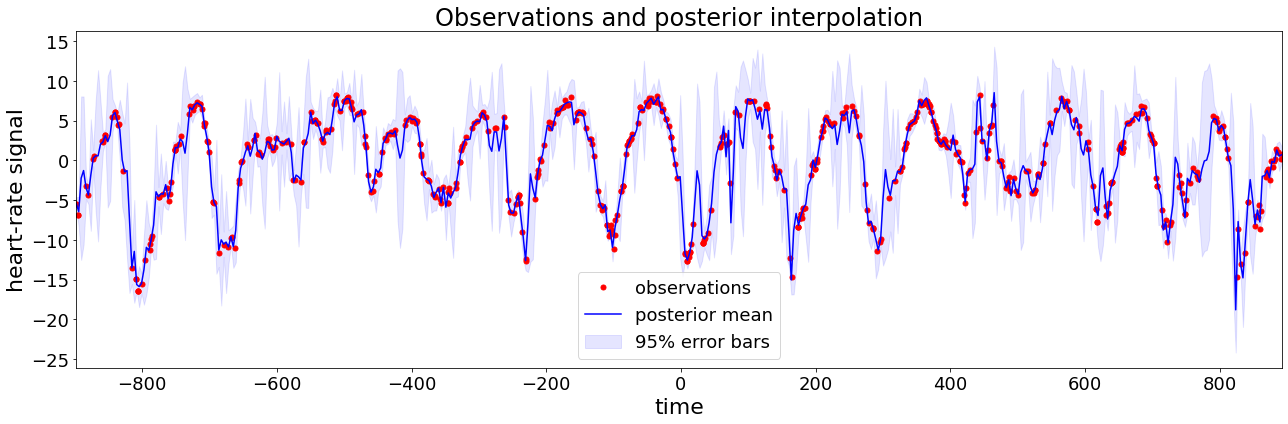

In [3]:
nll = my_bse.neg_log_likelihood()
print(f'Negative log likelihood (before training): {nll}')
my_bse.compute_moments()
my_bse.plot_time_posterior()


In [4]:
print(my_bse.theta)

0.01


In [5]:
%%time 
my_bse.train()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28901D+03    |proj g|=  1.59871D+02

At iterate    1    f=  1.19997D+03    |proj g|=  1.28423D+02


 This problem is unconstrained.



At iterate    2    f=  1.17034D+03    |proj g|=  1.46709D+02

At iterate    3    f=  1.14558D+03    |proj g|=  6.50532D+01

At iterate    4    f=  1.08839D+03    |proj g|=  1.33339D+02

At iterate    5    f=  1.05974D+03    |proj g|=  1.02501D+02

At iterate    6    f=  1.04733D+03    |proj g|=  6.43236D+01

At iterate    7    f=  1.03959D+03    |proj g|=  7.42049D+01

At iterate    8    f=  1.03451D+03    |proj g|=  2.33847D+01

At iterate    9    f=  1.03335D+03    |proj g|=  5.06360D+00

At iterate   10    f=  1.03328D+03    |proj g|=  3.35000D+00

At iterate   11    f=  1.03321D+03    |proj g|=  3.18153D+00

At iterate   12    f=  1.03296D+03    |proj g|=  5.15914D+00

At iterate   13    f=  1.03273D+03    |proj g|=  5.96050D+00

At iterate   14    f=  1.03250D+03    |proj g|=  2.34064D+00

At iterate   15    f=  1.03242D+03    |proj g|=  4.11956D-01

At iterate   16    f=  1.03238D+03    |proj g|=  9.71500D-01

At iterate   17    f=  1.03237D+03    |proj g|=  1.10078D+00

At iter

In [6]:
print(my_bse.theta)

0.0002660796794337736


Negative log likelihood (before training): 1032.3250687825666


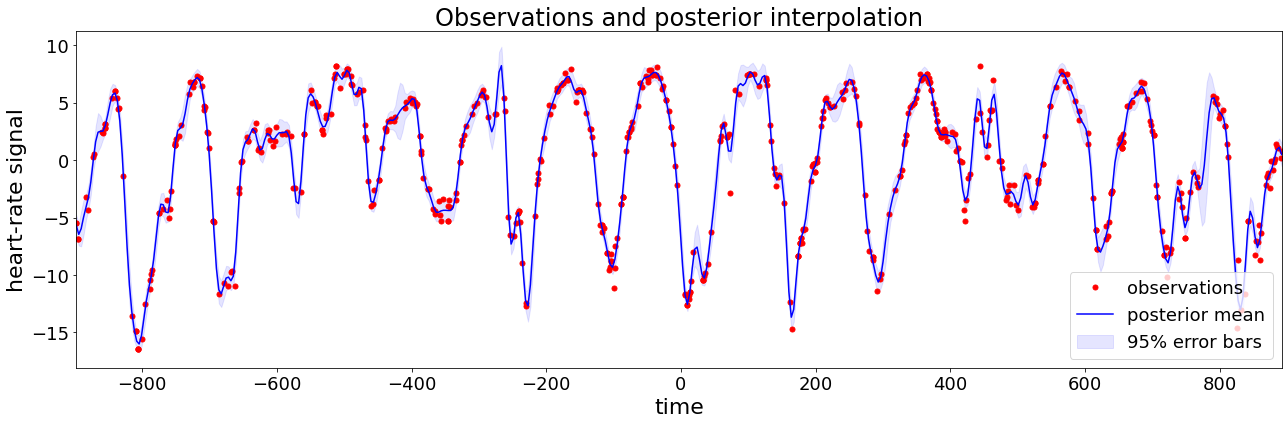

In [7]:
nll = my_bse.neg_log_likelihood()
print(f'Negative log likelihood (before training): {nll}')
my_bse.compute_moments()
my_bse.plot_time_posterior()
plt.savefig("posterior_time.pdf", bbox_inches='tight', pad_inches=0)

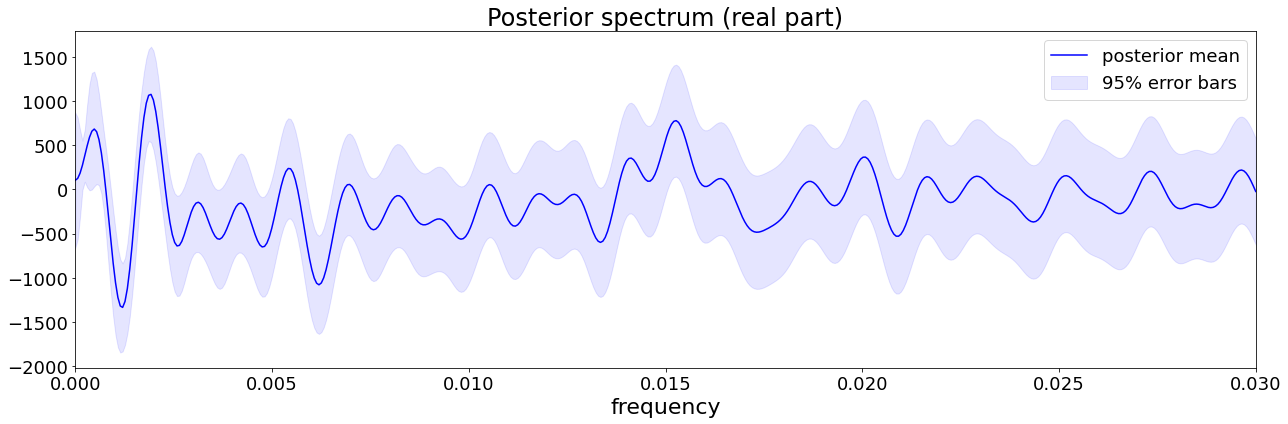

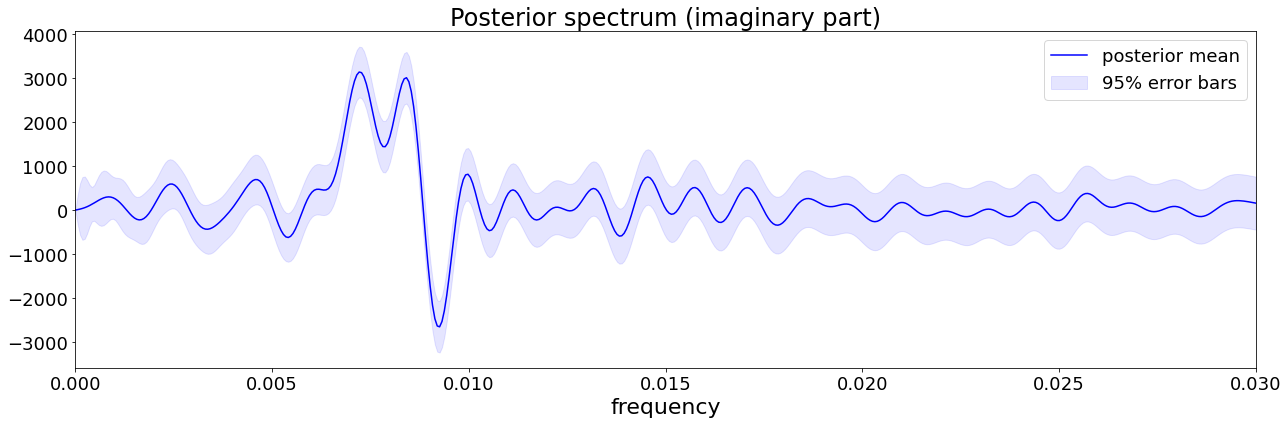

In [8]:
my_bse.plot_freq_posterior_real()
plt.savefig("posterior_spectrum_real.pdf", bbox_inches='tight', pad_inches=0)
my_bse.plot_freq_posterior_imag()
plt.savefig("posterior_spectrum_imag.pdf", bbox_inches='tight', pad_inches=0)


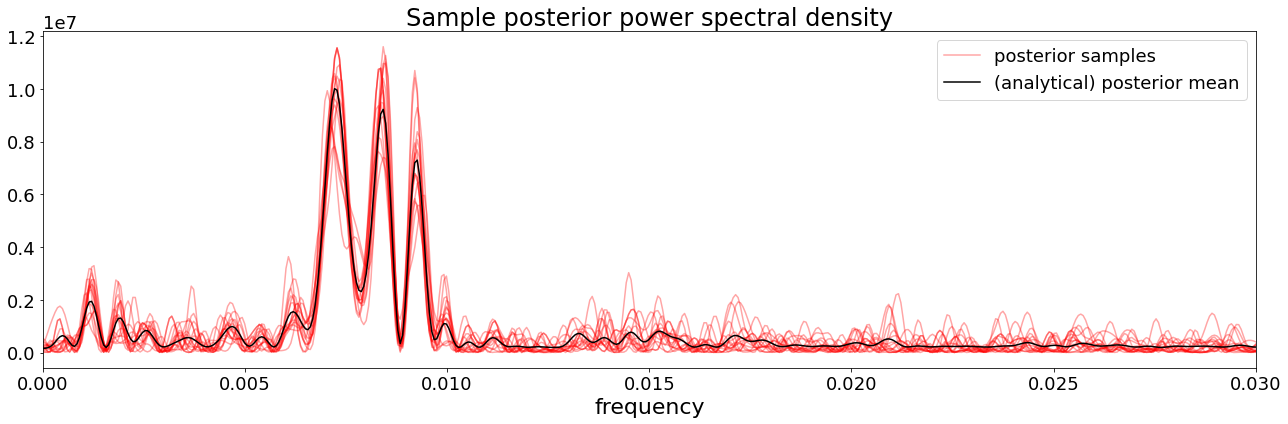

In [9]:
my_bse.plot_power_spectral_density(15)

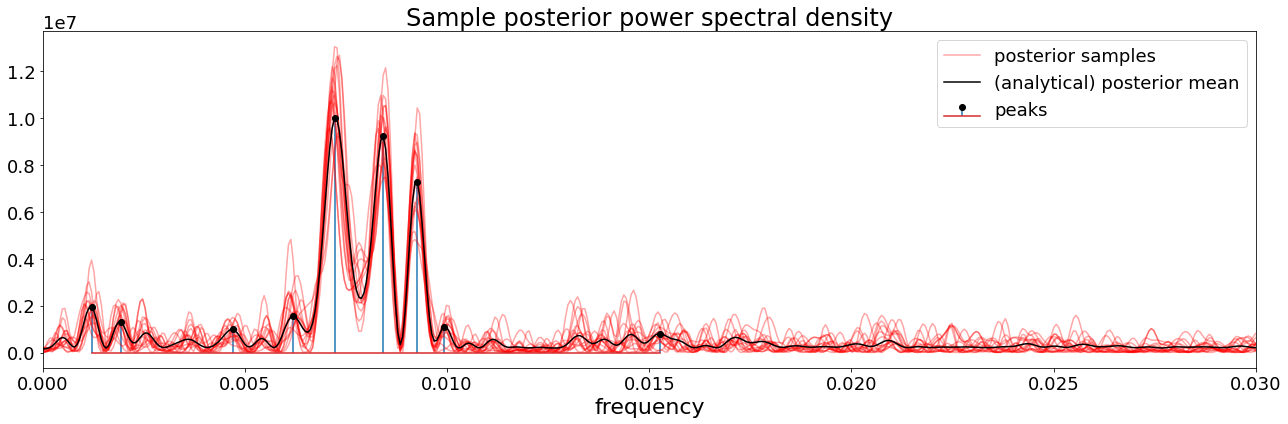

In [10]:
peaks, widths = my_bse.plot_power_spectral_density(15, 'show peaks');
plt.savefig("posterior_psd.pdf", bbox_inches='tight', pad_inches=0)

In [11]:
print(f'Peaks are at positions {peaks*(my_bse.w[1]-my_bse.w[0]) }')
print(f'and their widths are {widths[0]*(my_bse.w[1]-my_bse.w[0])}')

Peaks are at positions [0.0012024  0.00192385 0.00468938 0.00619238 0.00721443 0.00841683
 0.00925852 0.00991984 0.01527054]
and their widths are [0.00038619 0.00036814 0.00048252 0.00034112 0.00064477 0.00043104
 0.00041326 0.00025474 0.00076445]
